# テキストマイニング第一回課題 ドキュメントの類似度を計算する  
## ドキュメントの前処理

In [6]:
!pip install nltk
!pip install gensim
!pip install pandas

     |████████████████████████████████| 10.0 MB 3.1 MB/s 


In [8]:
import nltk
import numpy as np
import pandas as pd

In [9]:
nltk.download("stopwords")
nltk.download("wordnet")
nltk.download("punkt")

[nltk_data] Downloading package stopwords to /Users/kento/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/kento/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/kento/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [11]:
# twitterのサンプルツイートを取得
nltk.download("twitter_samples")

[nltk_data] Downloading package twitter_samples to
[nltk_data]     /Users/kento/nltk_data...
[nltk_data]   Unzipping corpora/twitter_samples.zip.


True

In [51]:
# twiiterサンプルから10文抜き取って分析を行う。
from nltk.corpus import twitter_samples
positive_tweets = twitter_samples.strings('positive_tweets.json')
tweets = positive_tweets[:10]
for i in range(10):
    print(tweets[i])

#FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :)
@Lamb2ja Hey James! How odd :/ Please call our Contact Centre on 02392441234 and we will be able to assist you :) Many thanks!
@DespiteOfficial we had a listen last night :) As You Bleed is an amazing track. When are you in Scotland?!
@97sides CONGRATS :)
yeaaaah yippppy!!!  my accnt verified rqst has succeed got a blue tick mark on my fb profile :) in 15 days
@BhaktisBanter @PallaviRuhail This one is irresistible :)
#FlipkartFashionFriday http://t.co/EbZ0L2VENM
We don't like to keep our lovely customers waiting for long! We hope you enjoy! Happy Friday! - LWWF :) https://t.co/smyYriipxI
@Impatientraider On second thought, there’s just not enough time for a DD :) But new shorts entering system. Sheep must be buying.
Jgh , but we have to go to Bayan :D bye
As an act of mischievousness, am calling the ETL layer of our in-house warehousing app Katamari.

Well… as the name implie

In [80]:
import re
def cleaning_text(text):
    # @の削除
    pattern1 = '@[\w/:%#\$&\?\(\)~\.=\+\-…]+'
    text = re.sub(pattern1, '', text)
    pattern2 = '#[\w/:%#\$&\?\(\)~\.=\+\-…]+'
    text = re.sub(pattern2, '', text)
    pattern3 = 'https://[\w/:%#\$&\?\(\)~\.=\+\-…]+'
    text = re.sub(pattern3, '', text)
    pattern4 = 'http://[\w/:%#\$&\?\(\)~\.=\+\-…]+'
    text = re.sub(pattern4, '', text)
    return text  


['    for being top engaged members in my community this week :)', ' Hey James! How odd :/ Please call our Contact Centre on 02392441234 and we will be able to assist you :) Many thanks!', ' we had a listen last night :) As You Bleed is an amazing track. When are you in Scotland?!', ' CONGRATS :)', 'yeaaaah yippppy!!!  my accnt verified rqst has succeed got a blue tick mark on my fb profile :) in 15 days', '  This one is irresistible :)\n ', "We don't like to keep our lovely customers waiting for long! We hope you enjoy! Happy Friday! - LWWF :) ", ' On second thought, there’s just not enough time for a DD :) But new shorts entering system. Sheep must be buying.', 'Jgh , but we have to go to Bayan :D bye', 'As an act of mischievousness, am calling the ETL layer of our in-house warehousing app Katamari.\n\nWell… as the name implies :p.']


In [72]:
print(clear_tweets[6])

for being top engaged members in my community this week :)


In [102]:
# トークン化を施す
def tokenize_text(text):
  text = re.sub('[.,]', '', text)
  return text.split()

In [89]:
from nltk.corpus import wordnet as wn
def lemmatize_word(word):
    # make words lower  example: Python =>python
    word=word.lower()
    
    # lemmatize  example: cooked=>cook
    lemma = wn.morphy(word)
    if lemma is None:
        return word
    else:
      return lemma

['for', 'being', 'top', 'engage', 'member', 'in', 'my', 'community', 'this', 'week', ':)']
['hey', 'james!', 'how', 'odd', ':/', 'please', 'call', 'our', 'contact', 'centre', 'on', '02392441234', 'and', 'we', 'will', 'be', 'able', 'to', 'assist', 'you', ':)', 'many', 'thanks!']
['we', 'have', 'a', 'listen', 'last', 'night', ':)', 'as', 'you', 'bleed', 'be', 'an', 'amaze', 'track', 'when', 'are', 'you', 'in', 'scotland?!']
['congrats', ':)']
['yeaaaah', 'yippppy!!!', 'my', 'accnt', 'verify', 'rqst', 'ha', 'succeed', 'get', 'a', 'blue', 'tick', 'mark', 'on', 'my', 'fb', 'profile', ':)', 'in', '15', 'days']
['this', 'one', 'be', 'irresistible', ':)']
['we', "don't", 'like', 'to', 'keep', 'our', 'lovely', 'customer', 'waiting', 'for', 'long!', 'we', 'hope', 'you', 'enjoy!', 'happy', 'friday!', '-', 'lwwf', ':)']
['on', 'second', 'thought', 'there’s', 'just', 'not', 'enough', 'time', 'for', 'a', 'dd', ':)', 'but', 'new', 'shorts', 'entering', 'system', 'sheep', 'must', 'be', 'buying']
['jgh

In [94]:
#1 nltkのストップワードリスト
en_stop = nltk.corpus.stopwords.words('english')
# print(en_stop)
def remove_stopwords(word, stopwordset):
  if word in stopwordset:
    return None
  else:
    return word

[None, None, 'top', 'engage', 'member', None, None, 'community', None, 'week', ':)']
['hey', 'james!', None, 'odd', ':/', 'please', 'call', None, 'contact', 'centre', None, '02392441234', None, None, None, None, 'able', None, 'assist', None, ':)', 'many', 'thanks!']
[None, None, None, 'listen', 'last', 'night', ':)', None, None, 'bleed', None, None, 'amaze', 'track', None, None, None, None, 'scotland?!']
['congrats', ':)']
['yeaaaah', 'yippppy!!!', None, 'accnt', 'verify', 'rqst', 'ha', 'succeed', 'get', None, 'blue', 'tick', 'mark', None, None, 'fb', 'profile', ':)', None, '15', 'days']
[None, 'one', None, 'irresistible', ':)']
[None, None, 'like', None, 'keep', None, 'lovely', 'customer', 'waiting', None, 'long!', None, 'hope', None, 'enjoy!', 'happy', 'friday!', '-', 'lwwf', ':)']
[None, 'second', 'thought', 'there’s', None, None, 'enough', 'time', None, None, 'dd', ':)', None, 'new', 'shorts', 'entering', 'system', 'sheep', 'must', None, 'buying']
['jgh', None, None, None, None, 'g

In [103]:
def preprocessing_text(text):
  text = cleaning_text(text)
  tokens = tokenize_text(text)
  tokens = [lemmatize_word(word) for word in tokens]
  tokens = [remove_stopwords(word, en_stop) for word in tokens]
  tokens = [word for word in tokens if word is not None]
  return tokens

preprocessed_docs = [preprocessing_text(text) for text in tweets]
preprocessed_docs;

以上でテキストの前処理が終了した。    
## 利用した表現手法  
今回はベクトル化の手法としてBoWと、TF-IDFを使用して解析を行った。

In [96]:
# BoWの実装
def bow_vectorizer(docs):
  word2id = {}
  for doc in docs:
    for w in doc:
      if w not in word2id:
        word2id[w] = len(word2id)
        
  result_list = []
  for doc in docs:
    doc_vec = [0] * len(word2id)
    for w in doc:
      doc_vec[word2id[w]] += 1
    result_list.append(doc_vec)
  return result_list, word2id

bow_vec, word2id = bow_vectorizer(preprocessed_docs)
print(bow_vec)

[[1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [98]:
# BoWの要素を確認
word2id.items()

dict_items([('top', 0), ('engage', 1), ('member', 2), ('community', 3), ('week', 4), (':)', 5), ('hey', 6), ('james!', 7), ('odd', 8), (':/', 9), ('please', 10), ('call', 11), ('contact', 12), ('centre', 13), ('02392441234', 14), ('able', 15), ('assist', 16), ('many', 17), ('thanks!', 18), ('listen', 19), ('last', 20), ('night', 21), ('bleed', 22), ('amaze', 23), ('track', 24), ('scotland?!', 25), ('congrats', 26), ('yeaaaah', 27), ('yippppy!!!', 28), ('accnt', 29), ('verify', 30), ('rqst', 31), ('ha', 32), ('succeed', 33), ('get', 34), ('blue', 35), ('tick', 36), ('mark', 37), ('fb', 38), ('profile', 39), ('15', 40), ('days', 41), ('one', 42), ('irresistible', 43), ('like', 44), ('keep', 45), ('lovely', 46), ('customer', 47), ('waiting', 48), ('long!', 49), ('hope', 50), ('enjoy!', 51), ('happy', 52), ('friday!', 53), ('-', 54), ('lwwf', 55), ('second', 56), ('thought', 57), ('there’s', 58), ('enough', 59), ('time', 60), ('dd', 61), ('new', 62), ('shorts', 63), ('entering', 64), ('sys

In [100]:
# TF-IDFの実装
def tfidf_vectorizer(docs):
  def tf(word2id, doc):
    term_counts = np.zeros(len(word2id))
    for term in word2id.keys():
      term_counts[word2id[term]] = doc.count(term)
    tf_values = list(map(lambda x: x/sum(term_counts), term_counts))
    return tf_values
  
  def idf(word2id, docs):
    idf = np.zeros(len(word2id))
    for term in word2id.keys():
      idf[word2id[term]] = np.log(len(docs) / sum([bool(term in doc) for doc in docs]))
    return idf
  
  word2id = {}
  for doc in docs:
    for w in doc:
      if w not in word2id:
        word2id[w] = len(word2id)
  
  return [[_tf*_idf for _tf, _idf in zip(tf(word2id, doc), idf(word2id, docs))] for doc in docs], word2id

In [101]:
tfidf_vector, word2id = tfidf_vectorizer(preprocessed_docs)
print(tfidf_vector)
print(word2id.items())

[[0.3837641821656743, 0.3837641821656743, 0.3837641821656743, 0.3837641821656743, 0.3837641821656743, 0.037190591885701625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.015938825093872126, 0.16447036378528898, 0.16447036378528898, 0.16447036378528898, 0.16447036378528898, 0.16447036378528898, 0.16447036378528898, 0.16447036378528898, 0.16447036378528898, 0.16447036378528898, 0.16447036378528898, 0.16447036378528898, 0.16447036378528898, 0.16447036378528898, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

In [104]:
# コサイン類似度
def cosine_similarity(list_a, list_b):
  inner_prod = np.array(list_a).dot(np.array(list_b))
  norm_a = np.linalg.norm(list_a)
  norm_b = np.linalg.norm(list_b)
  try:
      return inner_prod / (norm_a*norm_b)
  except ZeroDivisionError:
      return 1.0

In [106]:
# ユークリッド距離
def euclidean_distance(list_a, list_b):
  diff_vec = np.array(list_a) - np.array(list_b)
  return np.linalg.norm(diff_vec)

In [126]:
!pip3 install matplotlib

  Using cached matplotlib-3.2.2-cp37-cp37m-macosx_10_9_x86_64.whl (12.5 MB)
  Using cached kiwisolver-1.2.0-cp37-cp37m-macosx_10_9_x86_64.whl (60 kB)
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)
  Using cached pyparsing-2.4.7-py2.py3-none-any.whl (67 kB)


In [127]:
import matplotlib.pyplot as plt
def draw_heatmap(data, row_labels, column_labels):
    # 描画する
    fig, ax = plt.subplots()
    heatmap = ax.pcolor(data, cmap=plt.cm.Blues)

    ax.set_xticks(np.arange(data.shape[0]) + 0.5, minor=False)
    ax.set_yticks(np.arange(data.shape[1]) + 0.5, minor=False)

    ax.invert_yaxis()
    ax.xaxis.tick_top()

    ax.set_xticklabels(row_labels, minor=False)
    ax.set_yticklabels(column_labels, minor=False)
    plt.show()
    plt.savefig('image.png')

    return heatmap

## 実行結果

[[0.         0.00116337 0.00158491 0.00417652 0.00108309 0.00296014
  0.00121083 0.00116337 0.         0.        ]
 [0.00116337 0.         0.00098349 0.00259167 0.00067209 0.00183686
  0.00075136 0.00072191 0.         0.        ]
 [0.00158491 0.00098349 0.         0.00353075 0.00091562 0.00250245
  0.00102361 0.00098349 0.         0.        ]
 [0.00417652 0.00259167 0.00353075 0.         0.00241283 0.0065944
  0.00269741 0.00259167 0.         0.        ]
 [0.00108309 0.00067209 0.00091562 0.00241283 0.         0.00171011
  0.00069951 0.00067209 0.         0.        ]
 [0.00296014 0.00183686 0.00250245 0.0065944  0.00171011 0.
  0.00191181 0.00183686 0.         0.        ]
 [0.00121083 0.00075136 0.00102361 0.00269741 0.00069951 0.00191181
  0.         0.00075136 0.         0.        ]
 [0.00116337 0.00072191 0.00098349 0.00259167 0.00067209 0.00183686
  0.00075136 0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.   

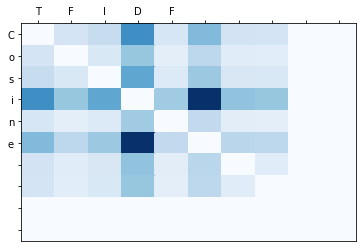

<Figure size 432x288 with 0 Axes>

In [133]:
# TF-IDFをコサイン類似度を用いて分析した
tfidf_cosine_similarity=np.zeros((len(tfidf_vector),len(tfidf_vector)))
for i in range(len(tfidf_vector)):
    for j in range(len(tfidf_vector)):
        if(i == j):
            tfidf_cosine_similarity[i][j] = 0.0
        else :
            tfidf_cosine_similarity[i][j] = cosine_similarity(tfidf_vector[i],tfidf_vector[j])

print(tfidf_cosine_similarity)
draw_heatmap(tfidf_cosine_similarity,"TFIDF","Cosine")

[[0.         0.10910895 0.14433757 0.28867513 0.10206207 0.23570226
  0.1132277  0.10910895 0.         0.        ]
 [0.10910895 0.         0.09449112 0.18898224 0.06681531 0.15430335
  0.07412493 0.07142857 0.         0.        ]
 [0.14433757 0.09449112 0.         0.25       0.08838835 0.20412415
  0.09805807 0.09449112 0.         0.        ]
 [0.28867513 0.18898224 0.25       0.         0.1767767  0.40824829
  0.19611614 0.18898224 0.         0.        ]
 [0.10206207 0.06681531 0.08838835 0.1767767  0.         0.14433757
  0.06933752 0.06681531 0.         0.        ]
 [0.23570226 0.15430335 0.20412415 0.40824829 0.14433757 0.
  0.16012815 0.15430335 0.         0.        ]
 [0.1132277  0.07412493 0.09805807 0.19611614 0.06933752 0.16012815
  0.         0.07412493 0.         0.        ]
 [0.10910895 0.07142857 0.09449112 0.18898224 0.06681531 0.15430335
  0.07412493 0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.  

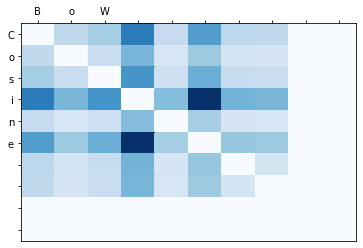

<Figure size 432x288 with 0 Axes>

In [134]:
# Bowに対するコサイン類似度を求めた
bow_cosine_similarity=np.zeros((len(bow_vec),len(bow_vec)))
for i in range(len(bow_vec)):
    for j in range(len(bow_vec)):
        if(i == j):
            bow_cosine_similarity[i][j] = 0.0
        else :
            bow_cosine_similarity[i][j] = cosine_similarity(bow_vec[i],bow_vec[j])

print(bow_cosine_similarity)
draw_heatmap(bow_cosine_similarity,"BoW","Cosine")

[[0.         0.95849356 0.87159208 0.69548802 0.97702984 0.72244879
  0.94777495 0.95849356 0.74574191 0.93429542]
 [0.95849356 0.         1.03600829 0.77007953 1.2287585  0.80758911
  1.17191816 1.19241017 0.84146883 1.14726823]
 [0.87159208 1.03600829 0.         0.72312577 1.0595529  0.75372358
  1.02249898 1.03600829 0.7806183  1.00579425]
 [0.69548802 0.77007953 0.72312577 0.         0.77952403 0.6318168
  0.76452838 0.77007953 0.64572563 0.75684613]
 [0.97702984 1.2287585  1.0595529  0.77952403 0.         0.81854276
  1.20636602 1.2287585  0.8539737  1.17958414]
 [0.72244879 0.80758911 0.75372358 0.6318168  0.81854276 0.
  0.80117007 0.80758911 0.66754071 0.79266022]
 [0.94777495 1.17191816 1.02249898 0.76452838 1.20636602 0.80117007
  0.         1.17191816 0.834162   1.12895362]
 [0.95849356 1.19241017 1.03600829 0.77007953 1.2287585  0.80758911
  1.17191816 0.         0.84146883 1.14726823]
 [0.74574191 0.84146883 0.7806183  0.64572563 0.8539737  0.66754071
  0.834162   0.841468

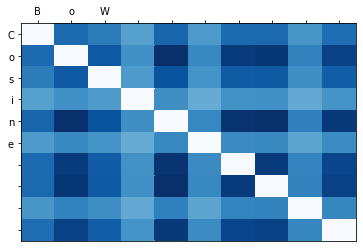

<Figure size 432x288 with 0 Axes>

In [137]:
# tfidfベクトルに対する、ユークリッド距離の逆数をヒートマップに表した。
tfidf_euclidean_distance=np.zeros((len(tfidf_vector),len(tfidf_vector)))
for i in range(len(tfidf_vector)):
    for j in range(len(tfidf_vector)):
        if(i == j):
            tfidf_euclidean_distance[i][j] = 0.0
        else :
            tfidf_euclidean_distance[i][j] = 1/euclidean_distance(tfidf_vector[i],tfidf_vector[j])

print(tfidf_euclidean_distance)
draw_heatmap(tfidf_euclidean_distance,"TFIDF","euclidean")

[[0.         0.23570226 0.28867513 0.40824829 0.2236068  0.37796447
  0.24253563 0.23570226 0.30151134 0.22941573]
 [0.23570226 0.         0.2236068  0.26726124 0.18898224 0.25819889
  0.2        0.19611614 0.22941573 0.19245009]
 [0.28867513 0.2236068  0.         0.35355339 0.21320072 0.33333333
  0.22941573 0.2236068  0.2773501  0.21821789]
 [0.40824829 0.26726124 0.35355339 0.         0.25       0.57735027
  0.2773501  0.26726124 0.37796447 0.25819889]
 [0.2236068  0.18898224 0.21320072 0.25       0.         0.24253563
  0.19245009 0.18898224 0.21821789 0.18569534]
 [0.37796447 0.25819889 0.33333333 0.57735027 0.24253563 0.
  0.26726124 0.25819889 0.35355339 0.25      ]
 [0.24253563 0.2        0.22941573 0.2773501  0.19245009 0.26726124
  0.         0.2        0.23570226 0.19611614]
 [0.23570226 0.19611614 0.2236068  0.26726124 0.18898224 0.25819889
  0.2        0.         0.22941573 0.19245009]
 [0.30151134 0.22941573 0.2773501  0.37796447 0.21821789 0.35355339
  0.23570226 0.22941

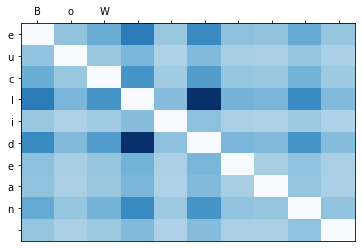

<Figure size 432x288 with 0 Axes>

In [138]:
# BoWベベクトルに対する、ユークリッド距離の逆数をヒートマップに表した。

bow_euclidean_distance=np.zeros((len(bow_vec),len(bow_vec)))
for i in range(len(bow_vec)):
    for j in range(len(bow_vec)):
        if(i == j):
            bow_euclidean_distance[i][j] = 0.0
        else :
            bow_euclidean_distance[i][j] = 1/euclidean_distance(bow_vec[i],bow_vec[j])

print(bow_euclidean_distance)
draw_heatmap(bow_euclidean_distance,"BoW","euclidean")

## レポート  
### 利用した表現手法

## 利用した距離尺度   
今回は距離尺度としてコサイン類似度とユークリッド距離を用いて計算を行った。